In [1]:
import numpy as np
import pandas as pd
import os
import pathlib
import tensorflow as tf
from tensorflow import keras
import cv2
import PIL

In [2]:
import pathlib

# Define the data directory
url = "C:/Users/seerl/OneDrive/Desktop/jupyter notebook/datasets/flowers_photos/flower_photos"
data_dir = pathlib.Path(url)

# Use glob to find all .jpg files in the subdirectories
image_url = list(data_dir.glob("*/*.jpg"))
print(image_url[:5])  # Display the first few entries


[WindowsPath('C:/Users/seerl/OneDrive/Desktop/jupyter notebook/datasets/flowers_photos/flower_photos/daisy/100080576_f52e8ee070_n.jpg'), WindowsPath('C:/Users/seerl/OneDrive/Desktop/jupyter notebook/datasets/flowers_photos/flower_photos/daisy/10140303196_b88d3d6cec.jpg'), WindowsPath('C:/Users/seerl/OneDrive/Desktop/jupyter notebook/datasets/flowers_photos/flower_photos/daisy/10172379554_b296050f82_n.jpg'), WindowsPath('C:/Users/seerl/OneDrive/Desktop/jupyter notebook/datasets/flowers_photos/flower_photos/daisy/10172567486_2748826a8b.jpg'), WindowsPath('C:/Users/seerl/OneDrive/Desktop/jupyter notebook/datasets/flowers_photos/flower_photos/daisy/10172636503_21bededa75_n.jpg')]


In [3]:
len(image_url)

3670

In [4]:
#creating a dictionary for all flowers
flowers_images={
    "Roses":list(data_dir.glob("roses/*.jpg")),
     "daisy":list(data_dir.glob("daisy/*.jpg")),
     "dandelion":list(data_dir.glob("dandelion/*.jpg")),
     "sunflowers":list(data_dir.glob("sunflowers/*.jpg")),
     "tulips":list(data_dir.glob("tulips/*.jpg"))
    
}

In [7]:
#reading an image of roses
import PIL
image=PIL.Image.open(flowers_images["Roses"][1])

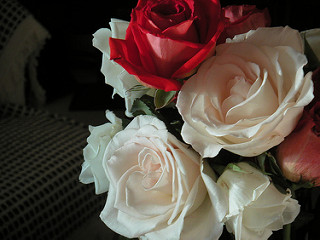

In [8]:
image

In [9]:
image_shape=np.array(image)
image_shape.shape

(240, 320, 3)

In [10]:
#resize it by using cv2 image shape=(180,180)
new_shape=cv2.resize(image_shape,(180,180))
new_shape.shape

(180, 180, 3)

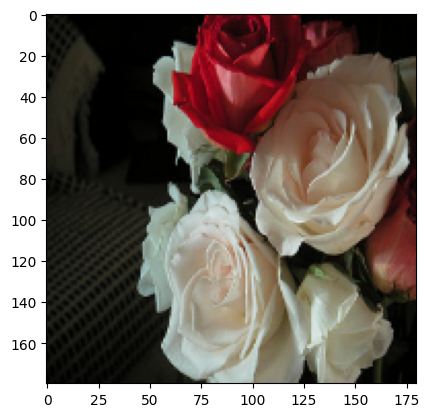

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
reshaped_image=plt.imshow(new_shape)

In [12]:
reshaped_image

In [13]:
#creating labels
flower_classes={
    "Roses":0,
    "daisy":1,
    "dandelion":2,
    "sunflowers":3,
    "tulips":4
    
}

In [60]:
image=cv2.imread(str(flowers_images["Roses"][0]))
image

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [14]:
#creating a loop to reshape all images and append to x list and labels to y list
x,y=[],[]
for flower_name,images in flowers_images.items():#keys and values
    for image in images:
        #creating numpy array
        img=cv2.imread(str(image))
        resized_image=cv2.resize(img,(180,180))
        x.append(resized_image)
        y.append(flower_classes[flower_name])
        
        

In [15]:
print(len(x),len(y))

3670 3670


In [16]:
x[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [17]:
y[0]

0

In [42]:
x=np.array(x)
y=np.array(y)

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(len(x_train),len(y_train))

2936 2936


In [44]:
#transfer learning model from keras API
resnet50=keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    pooling="same",
    classes=5,
    input_shape=(180,180,3)
)

In [45]:
#creating a model and using Transfer learning model
model = tf.keras.Sequential([
    resnet50,
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(5, activation="sigmoid")
])

In [46]:
for layers in resnet50.layers:#freezeing the layers
    layers.trainable=False

In [47]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [48]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 6, 6, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      37,749,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,339,525 (233.99 MB)

 Trainable params: 37,751,813 (144.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [49]:
history=model.fit(x_train,y_train,epochs=5)#some overfitted

Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.6339 - loss: 21.4799
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.9238 - loss: 0.5790
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.9680 - loss: 0.1428
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.9865 - loss: 0.0422
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.9952 - loss: 0.0271


In [50]:
expanded_x_test=np.expand_dims(x_test,axis=1)
expanded_x_test[1].shape

(1, 180, 180, 3)

In [51]:
# Make predictions using the model
predictions = model.predict(x_test)

# Print the predictions
print(predictions)

# Optionally, convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)


23/23 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step 
[[9.9999887e-01 7.1173522e-04 2.2822271e-06 9.9988025e-01 9.9998266e-01]
 [1.2843040e-16 9.9990046e-01 2.8695062e-01 1.0000000e+00 9.2933351e-01]
 [9.9999994e-01 2.2482032e-11 4.7484519e-09 5.1393235e-01 1.0000000e+00]
 ...
 [6.5166237e-13 1.0000000e+00 7.7624756e-01 6.5477722e-04 1.0038378e-04]
 [5.7380377e-05 3.5311898e-06 1.0000000e+00 2.6599972e-11 3.7070836e-06]
 [2.1855075e-13 4.2513341e-01 1.0000000e+00 1.9302583e-07 8.2457213e-05]]
[0 3 4 4 1 3 3 4 1 0 3 1 2 3 0 3 0 0 1 0 0 0 0 0 0 2 2 4 3 1 3 2 0 3 2 4 4
 3 0 0 4 0 2 3 1 1 4 2 3 2 2 0 0 3 2 3 3 2 4 0 3 2 4 1 2 3 4 0 4 2 2 1 3 2
 1 1 0 1 0 2 0 2 1 2 1 2 1 3 2 0 4 0 0 0 1 1 1 0 1 4 3 2 0 3 4 2 0 2 1 1 2
 4 0 4 3 2 2 2 4 4 0 0 1 0 2 1 2 4 1 0 4 3 4 0 3 3 1 1 3 3 3 2 1 4 2 4 1 0
 3 4 3 0 0 3 2 4 4 4 1 1 2 2 4 1 3 4 0 2 0 0 4 2 0 2 0 1 4 1 1 0 3 2 3 2 3
 2 0 3 1 3 0 0 1 4 1 4 0 4 3 3 3 2 0 0 4 3 0 0 2 1 4 1 0 0 2 0 0 1 0 0 0 1
 2 1 3 2 1 1 0 4 1 4 3 0 4 3 4 1 2 2 3 1 4 2 2 4 3 1 0 0 0 0 3 2 2

In [52]:
len(predicted_classes)

734

In [53]:
len(y_test)

734

In [54]:
from sklearn.metrics import confusion_matrix,classification_report

In [58]:
cm=confusion_matrix(y_test,predicted_classes)
cm

array([[136,   2,   1,   4,   7],
       [  3, 111,   5,   4,   3],
       [  0,  13, 141,  14,   4],
       [  0,   8,   4, 115,   2],
       [ 45,   1,   2,  11,  98]], dtype=int64)

<Axes: >

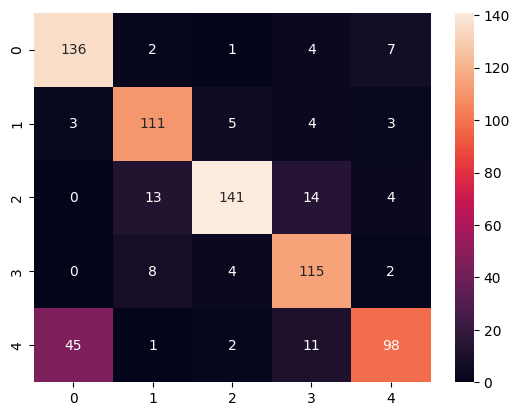

In [59]:
sns.heatmap(cm,annot=True,fmt="d")

In [62]:
cr=classification_report(y_test,predicted_classes)
print(f"{cr}\n")

              precision    recall  f1-score   support

           0       0.74      0.91      0.81       150
           1       0.82      0.88      0.85       126
           2       0.92      0.82      0.87       172
           3       0.78      0.89      0.83       129
           4       0.86      0.62      0.72       157

    accuracy                           0.82       734
   macro avg       0.82      0.82      0.82       734
weighted avg       0.83      0.82      0.82       734




In [63]:
#MODEL EVALUTAION
model.evaluate(x_train,y_train)#some overfitted right thats why

92/92 ━━━━━━━━━━━━━━━━━━━━ 94s 981ms/step - accuracy: 0.9988 - loss: 0.0045


[0.004615117330104113, 0.9986376166343689]

In [64]:
model.evaluate(x_test,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 973ms/step - accuracy: 0.8506 - loss: 1.6504


[1.6635488271713257, 0.8623978495597839]

In [71]:
classes=["Roses","daisy","dandelion","sunflowers","tulips"]

In [78]:
def load_image(index):
    img=x_test[index]
    plt.imshow(img)
    plt.xlabel(classes[y_test[index]])
    plt.show()

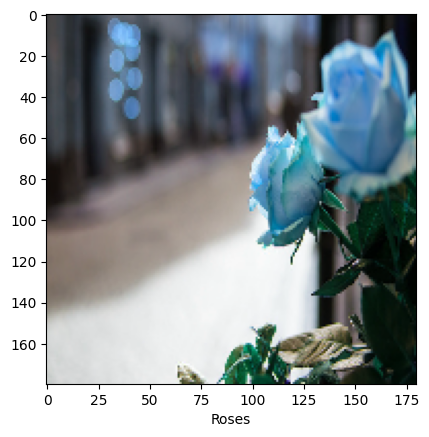

In [79]:
load_image(10)

In [65]:
#thank you !!